<a href="https://colab.research.google.com/github/kumarirakhi19/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [71]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly as pl
import plotly.graph_objs as gobj
import pandas as pd
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [72]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [73]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
path ='/content/drive/MyDrive/Colab Notebooks/MACHINE LEARNING/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'

In [75]:
net_df = pd.read_csv(path)

In [76]:
net_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [77]:
net_df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [78]:
print(net_df.isnull().any())

show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration        False
listed_in       False
description     False
dtype: bool


In [79]:
net_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [10]:
net_df.isnull().sum().sum()

3631

In [112]:
net_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,director3,director2,directorCode2
0,s1,TV Show,3%,MR,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,MR,NaN,2180
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Jorge Michel Grau,NaN,1789
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Gilbert Chan,NaN,1253
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Shane Acker,NaN,3356
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Robert Luketic,NaN,3096


# **DATA CLEANING**

In [17]:
net_df.director.fillna("No Director", inplace=True)
net_df.cast.fillna("No Cast", inplace=True)
net_df.country.fillna("Country Unavailable", inplace=True)

In [12]:
net_df.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

In [13]:
net_df["rating"].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [14]:
net_df[net_df["rating"].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


Since there are only 7 rows so I decided to find there replacements from internet.

In [18]:
 rating_replacements = {
    67: 'TV-PG',
    2359: 'TV-14',
    3660: 'TV-MA',
    3736: 'TV-MA',
    3737: 'NR',
    3738: 'TV-MA',
    4323: 'TV-MA '
}

for id, rate in rating_replacements.items():
    net_df.iloc[id, 8] = rate

In [16]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

net_df['target_ages'] = net_df['rating'].replace(ratings_ages)
net_df['target_ages'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids', 'TV-MA '], dtype=object)

# **EXPLORATORY ANALYSIS AND VISUALISATION**

**1.Netflix Content By Type**

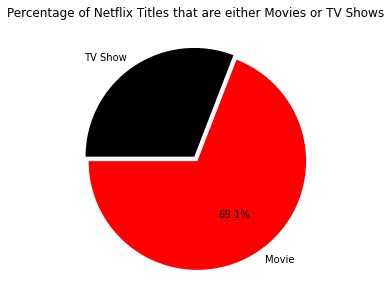

In [19]:
plt.figure(figsize=(10,5))
plt.title("Percentage of Netflix Titles that are either Movies or TV Shows")
g = plt.pie(net_df.type.value_counts(),explode=(0.025,0.025), labels=net_df.type.value_counts().index, colors=['red','black'],autopct='%1.1f%%', startangle=180)
plt.show()

Nearly 2/3rd of the content on netflix are movies while the rest are TV Show

In [19]:
net_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
net_df['target_ages'] = net_df['rating'].replace(ratings_ages)
net_df['target_ages'].unique()

In [15]:
def generate_rating_df(net_df):
    rating_df = net_df.groupby(['rating', 'target_ages']).agg({'show_id': 'count'}).reset_index()
    rating_df = net_df[net_df['show_id'] != 0]
    rating_df.columns = ['rating', 'target_ages', 'counts']
    rating_df = net_df.sort_values('target_ages')
    return rating_df

In [21]:
netflix_shows=net_df[net_df['type']=='TV Show']

In [22]:
netflix_movies=net_df[net_df['type']=='Movie']

([<matplotlib.axis.YTick at 0x7f27e6e5b290>,
 [Text(0, 0, 'December'),
  Text(0, 0, 'November'),
  Text(0, 0, 'October'),
  Text(0, 0, 'September'),
  Text(0, 0, 'August'),
  Text(0, 0, 'July'),
  Text(0, 0, 'June'),
  Text(0, 0, 'May'),
  Text(0, 0, 'April'),
  Text(0, 0, 'March'),
  Text(0, 0, 'February'),
  Text(0, 0, 'January')])

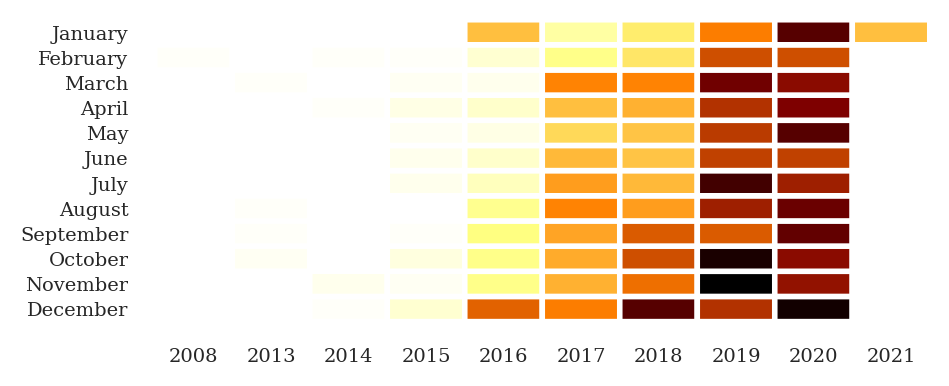

In [23]:
netflix_date = netflix_shows[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(5, 2), dpi=200)
plt.pcolor(df, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

If the latest year 2019 is considered, January and December were the months when comparatively much less content was released.Therefore, these months may be a good choice for the success of a new release!

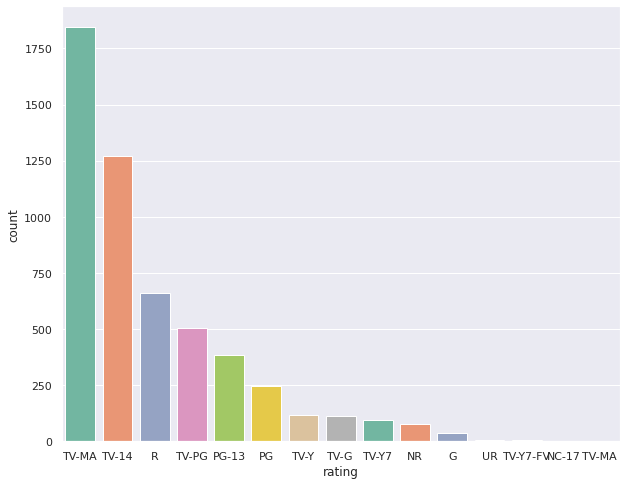

In [24]:
plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_movies, palette="Set2", order=netflix_movies['rating'].value_counts().index[0:15])

The largest count of movies are made with the 'TV-MA' rating."TV-MA" is a rating assigned by the TV Parental Guidelines to a television program that was designed for mature audiences only.

Second largest is the 'TV-14' stands for content that may be inappropriate for children younger than 14 years of age.

Third largest is the very popular 'R' rating.An R-rated film is a film that has been assessed as having material which may be unsuitable for children under the age of 17 by the Motion Picture Association of America; the MPAA writes "Under 17 requires accompanying parent or adult guardian".

**YEAR WISE ANALYSIS**

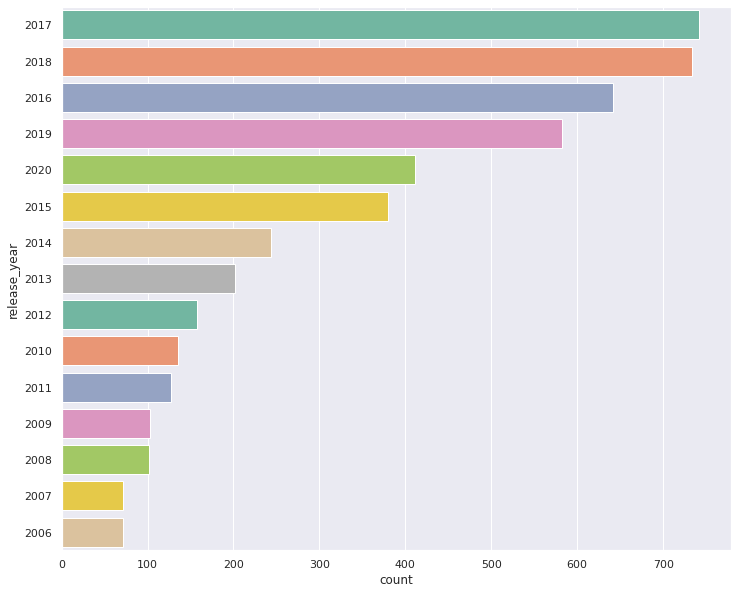

In [25]:
plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix_movies, palette="Set2", order=netflix_movies['release_year'].value_counts().index[0:15])

Most of the movies were released in the year 2017 followed by 2018 and 2016.

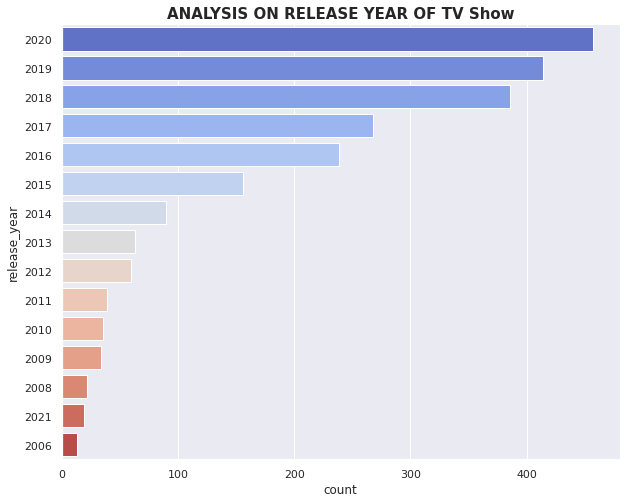

In [27]:
plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix_shows, palette="coolwarm", order=netflix_shows['release_year'].value_counts().index[0:15])

plt.title('ANALYSIS ON RELEASE YEAR OF TV Show', fontsize=15, fontweight='bold')
plt.show()

Most of the TV Shows were released in 2020 followed by 2019 and 2018

# Analysis of duration of movies

In [28]:
netflix_movies['duration']=netflix_movies['duration'].str.replace(' min','')
netflix_movies['duration']=netflix_movies['duration'].astype(str).astype(int)
netflix_movies['duration']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1        93
2        78
3        80
4       123
6        95
       ... 
7781     88
7782     99
7783    111
7784     44
7786     90
Name: duration, Length: 5372, dtype: int64

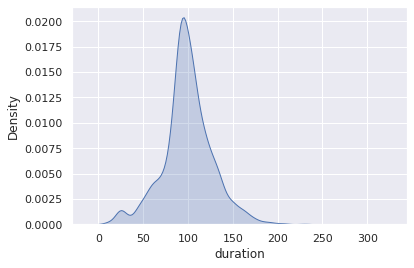

In [29]:
sns.set(style="darkgrid")
sns.kdeplot(data=netflix_movies['duration'], shade=True)

So, a good amount of movies on Netflix are among the duration of 75-120 mins. It is acceptable considering the fact that a fair amount of the audience cannot watch a 3 hour movie in one sitting.

In [35]:
import plotly.express as px

In [36]:
fig = px.histogram(x=netflix_shows['duration'])
fig.update_xaxes(categoryorder="total descending")
fig.update_layout(
    title="Distribution of TV Shows duration",
    xaxis_title="Duration of TV ShowS",
)
fig.show()

We can say that mostTV Shows end by season 3

**Top10 Genre in Movies and TV Shows**

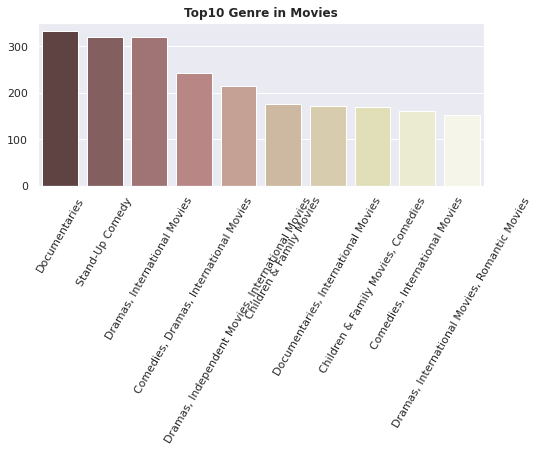

In [39]:
plt.figure(figsize=(8,3))
sns.barplot(x = netflix_movies["listed_in"].value_counts().head(10).index,
            y = netflix_movies["listed_in"].value_counts().head(10).values,palette="pink")
plt.xticks(rotation=60)
plt.title("Top10 Genre in Movies",fontweight="bold")
plt.show()

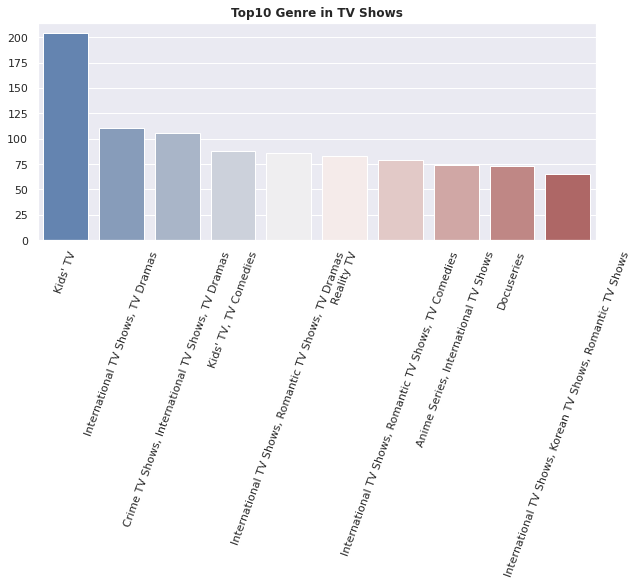

In [42]:
plt.figure(figsize=(10,4))
sns.barplot(x = netflix_shows["listed_in"].value_counts().head(10).index,
            y = netflix_shows["listed_in"].value_counts().head(10).values,palette="vlag")
plt.xticks(rotation=70)
plt.title("Top10 Genre in TV Shows",fontweight="bold")
plt.show()

**Top-20 countries producing most contents:**

In [49]:
from collections import Counter
country_data = net_df['country']
country_count = pd.Series(dict(Counter(','.join(country_data).replace(' ,',',').replace(
    ', ',',').split(',')))).sort_values(ascending=False)
top20country = country_count.head(20)

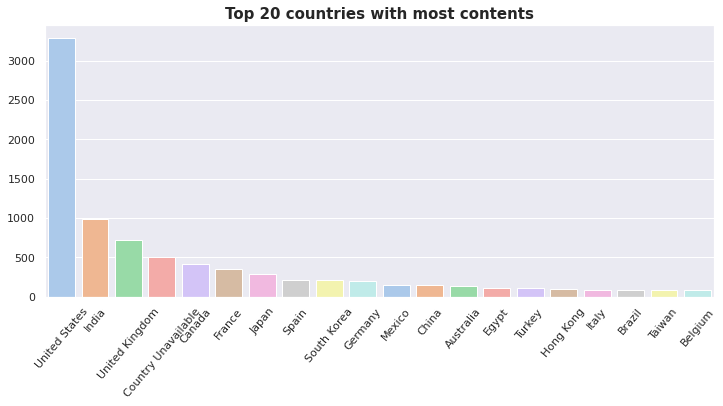

In [51]:
plt.figure(figsize=(12,5))
sns.barplot(x= top20country.index, y=top20country, palette="pastel")
plt.xticks(rotation=50)
plt.title('Top 20 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

 United States has the most content that is created on netflix in the tv series category.

 **Top Directors on Netflix**

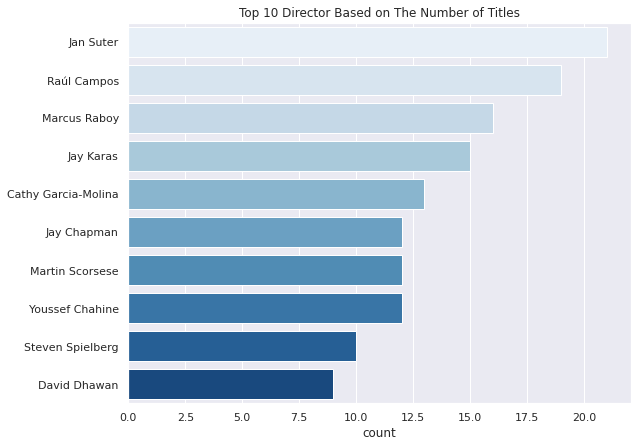

In [56]:
filtered_directors = net_df[net_df.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(9,7))
plt.title('Top 10 Director Based on The Number of Titles')
sns.countplot(y = filtered_directors, order=filtered_directors.value_counts().index[:10], palette='Blues')
plt.show()

The most popular director on Netflix, with the most titles, is mainly international.

**Top Genres on Netflix**

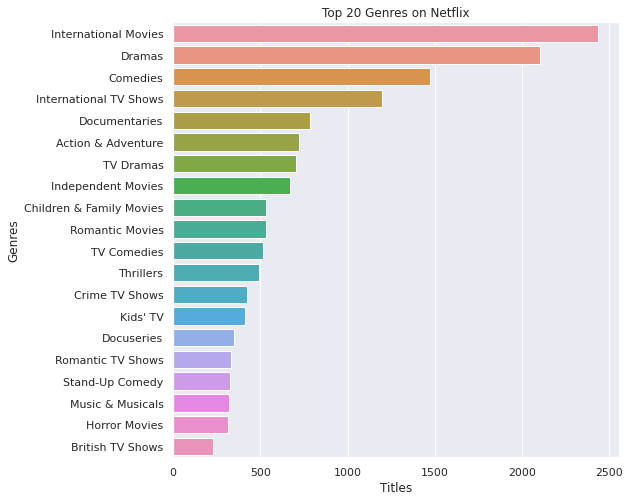

In [57]:
filtered_genres = net_df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(8,8))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

From the graph, we know that International Movies take the first place, followed by dramas and comedies.

**Top Actor on Netflix based on the number of titles**

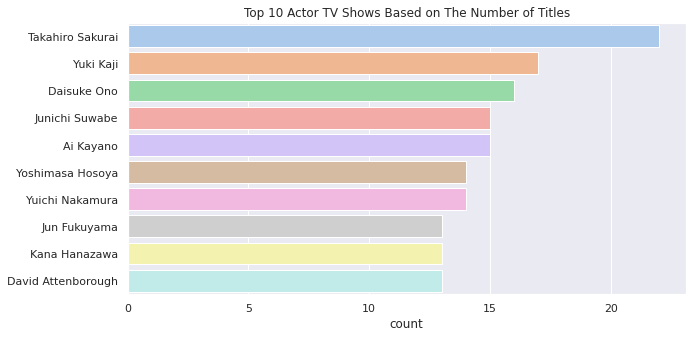

In [60]:
filtered_cast_shows = netflix_shows[netflix_shows.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(10,5))
plt.title('Top 10 Actor TV Shows Based on The Number of Titles')
sns.countplot(y = filtered_cast_shows, order=filtered_cast_shows.value_counts().index[:10], palette='pastel')
plt.show()

The top actor on Netflix TV Show, based on the number of titles, is Takahiro Sakurai.

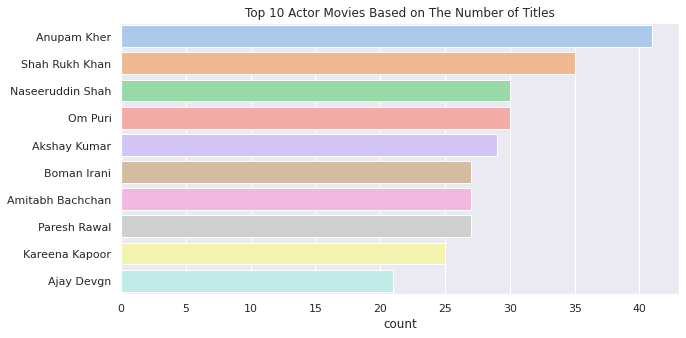

In [62]:
filtered_cast_movie = netflix_movies[netflix_movies.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(10,5))
plt.title('Top 10 Actor Movies Based on The Number of Titles')
sns.countplot(y = filtered_cast_movie, order=filtered_cast_movie.value_counts().index[:10], palette='pastel')
plt.show()

The top actor on Netflix Movies, based on the number of titles, is Anupam Kher.

**MODEL IMPLEMENTATION**

In [96]:
import collections
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot

In [100]:
col = "cast"
df['cast'] = net_df.cast.fillna("No Cast", inplace=True)
categories = (", ").join(df['cast']).split(", ")


TypeError: ignored

In [95]:

actorDictionary = {}
counter_list = collections.Counter(categories).most_common(1000)
counter_list = counter_list[1:1000]
Actors = [_[0] for _ in counter_list][::-1]
justActors = pd.DataFrame()
justActors['title'] = net_df['title']
justActors['cast'] = net_df['cast']


NameError: ignored

TypeError: ignored

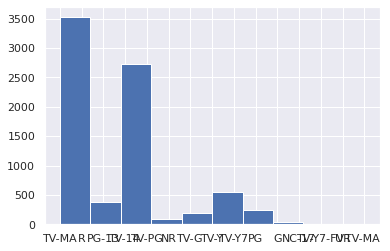

In [67]:
plt.hist(net_df['rating'])

#so most movies on netflix have a rating of 

x = net_df['rating'].median()
plt.axvline(x, color='k', linestyle='dashed', linewidth=1)
#plt.line(y=6.4)
plt.show()
len(actorDictionary)

In [69]:
ratingDic = {}

hay = net_df['title'].tolist()
hay = pd.Series(net_df.rating.values,index=df.title).to_dict()
    
hay

count = 0

AttributeError: ignored

In [68]:
def findIMDBaverage(name):
    ave = actorMean[name]
    return(ave)

#example
findIMDBaverage('Keanu Reeves')

NameError: ignored

In [105]:
net_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [103]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
X = netflix_movies

pca = PCA()
pca.fit(X)
print(pca.explained_variance_ratio_)

#pca.info()
plt.plot(range(1,6),pca.explained_variance_ratio_.cumsum(),marker='o')
plt.title("explained variance by components")
plt.xlabel('Number of Components')
plt.ylabel('Cumulative explained variance')

net_df.head()

ValueError: ignored

In [104]:
pca = PCA(n_components=3)
pca.fit(X)
scores_PCA = pca.transform(X)

#sum of squares
#we potentially want a lot of clusters so im going to say up to 100
sos = []
for i in range(1,100):
    kmeans_pca = KMeans(n_clusters = i,init ='k-means++',random_state=200)
    kmeans_pca.fit(scores_PCA)
    sos.append(kmeans_pca.inertia_)
    

ValueError: ignored

In [106]:


dfCopy = net_df
#only keep columns you want for algorith
dfCopy.head()
dfCopy['director'] = dfCopy.director.fillna('MR')

dfCopy['director3'], dfCopy['director2'] = dfCopy['director'].str.split(',',1).str
dfCopy.head()

dfCopy["director3"] = dfCopy["director3"].astype('category')
dfCopy["directorCode2"] = dfCopy["director3"].cat.codes
dfCopy = dfCopy.replace(-1,1)
dfCopy.head()
dfCopy["listed_in"] = dfCopy["listed_in"].astype('category')
dfCopy["genreCombo"] = dfCopy["listed_in"].cat.codes
dfCopy.head()
#dfCopy["genreCombo"].value_counts()

dfCopy["country"] = dfCopy["country"].astype('category')
dfCopy["country1"] = dfCopy["country"].cat.codes
dfCopy = dfCopy.set_index('show_id')
scalerValues = dfCopy.drop('type', axis=1) 
scalerValues = scalerValues.drop('title', axis=1) 
scalerValues = scalerValues.drop('director', axis=1) 
scalerValues = scalerValues.drop('cast', axis=1) 
scalerValues = scalerValues.drop('date_added', axis=1) 
scalerValues = scalerValues.drop('duration', axis=1) 
scalerValues = scalerValues.drop('listed_in', axis=1) 
scalerValues = scalerValues.drop('description', axis=1) 
scalerValues = scalerValues.drop('director2', axis=1) 
scalerValues = scalerValues.drop('director3', axis=1) 
scalerValues = scalerValues.drop('country', axis=1) 

scalerValues.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning:

Columnar iteration over characters will be deprecated in future releases.



,release_year,rating,directorCode2,genreCombo,country1
show_id,,,,,
s1,2020,TV-MA,2180,398,39
s2,2016,TV-MA,1789,310,308
s3,2011,R,1253,336,379
s4,2009,PG-13,3356,47,549
s5,2008,PG-13,3096,294,549


In [110]:
net_df['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [108]:
from sklearn import preprocessing

In [111]:
import imdb

ia = imdb.IMDb()

movies = ia.search_movie('matrix')
movies[0]

for k,v in movies[0].items():
    print(k,v)

ModuleNotFoundError: ignored

In [109]:

col_names = list(scalerValues.columns)


mm_scaler = preprocessing.MinMaxScaler()
df_mm = mm_scaler.fit_transform(scalerValues)

scalerValues = pd.DataFrame(df_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After MinMaxScaler')

sns.kdeplot(scalerValues['rating'], ax=ax1)

sns.kdeplot(scalerValues['genreCombo'], ax=ax1)
sns.kdeplot(scalerValues['directorCode2'], ax=ax1)
sns.kdeplot(scalerValues['release_year'], ax=ax1)
scalerValues.info()

ValueError: ignored